<a href="https://colab.research.google.com/github/gulabpatel/Statistics/blob/main/05%3A%20Imputing_Missing_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The video link of code walkthrough is here - https://www.youtube.com/watch?v=JGv9gaCU0i4

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/statistics/master/Dataset/churn_data_st.csv')
churn_master_df = churn_master_df.drop('gender', axis=1)

In [ ]:
churn_df = churn_master_df.copy()

In [ ]:
churn_df.head()

customerID - Customer ID

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

tenure - Number of months the customer has stayed with the company

ServiceCount - Number of services/product customer has availed

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)

In [ ]:
churn_df.info()

In [ ]:
churn_df.isna().sum()

In [ ]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().any())
print ("\nUnique values :  \n",churn_df.nunique())

In [ ]:
churn_df[churn_df.isna().any(axis=1)]

In [ ]:
churn_df[churn_df['tenure']==0]

In [ ]:
churn_df['TotalCharges'].describe()

In [ ]:
churn_df[churn_df['Churn']=='No'].describe()

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

In [ ]:
sns.distplot(churn_df['TotalCharges'], hist=True)

In [ ]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)

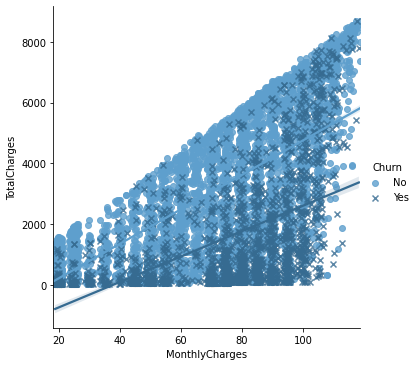

In [25]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, hue="Churn", markers=["o", "x"], palette="Blues_d") 

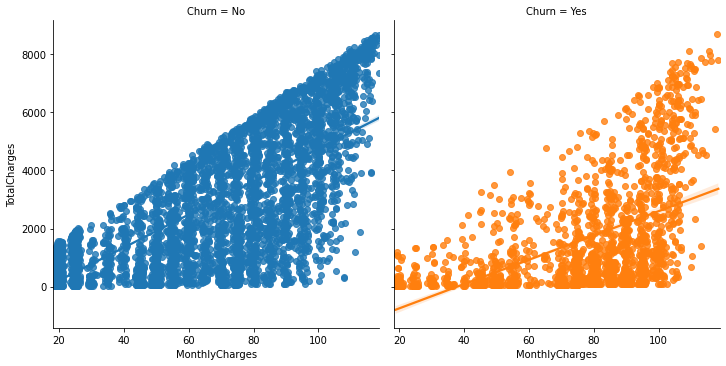

In [26]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn") 

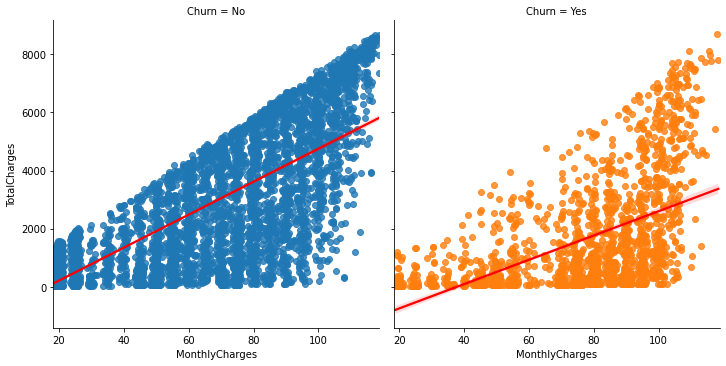

In [27]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'}) 

In [28]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [29]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


First create a model with the data where churn==No and TotalCharges is not Null and then will do the imputation

In [30]:
churn_no_df=churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]
churn_no_df.shape[0]

5147

In [31]:
churn_no_df.isna().any()

customerID          False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [32]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [33]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  56.73637552696062
intercept  :  -922.8160085118097
r_value :   0.7573902887184033
p_value :   0.0
std_err :   0.6819261867835148
R-squared:  0.5736400494449463


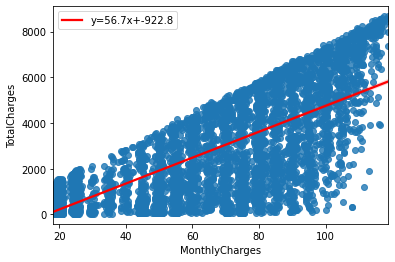

In [34]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

Now let's check for "tenure" and "totalcharges"

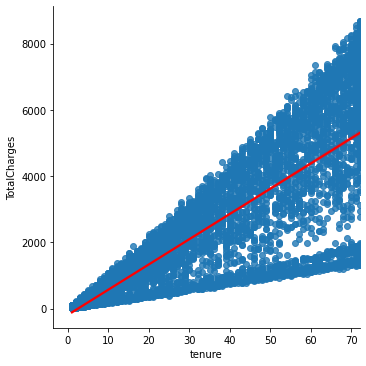

In [35]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, line_kws={'color':'red'}) 

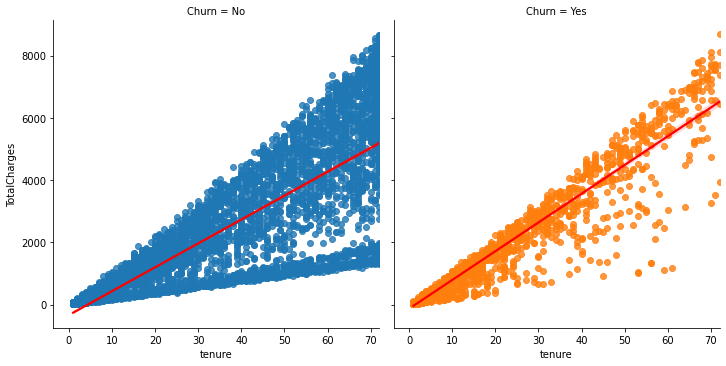

In [36]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'}) 

In [37]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [38]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [39]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure'],churn_no_df['TotalCharges'])

In [40]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  76.74259761920021
intercept  :  -334.08560506046933
r_value :   0.793287728023258
p_value :   0.0
std_err :   0.8211475250987232
R-squared:  0.6293054194323026


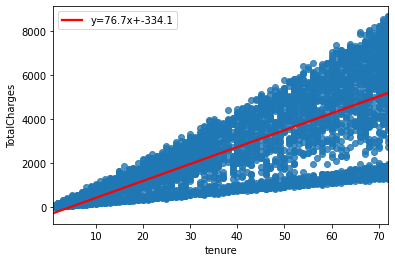

In [41]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

Now, let's combine tenure and MonthlyCharges

In [42]:
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
churn_no_df.head()

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [44]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


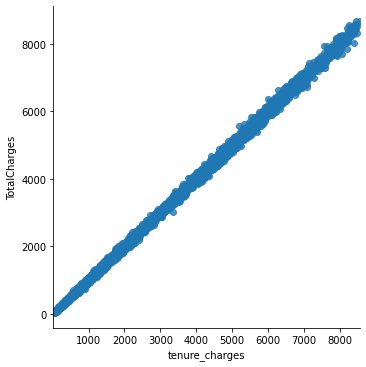

In [45]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_no_df) 

In [46]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure_charges'],churn_no_df['TotalCharges'])

In [47]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  1.0001720821518205
intercept  :  -0.3010983695039613
r_value :   0.9995350350972924
p_value :   0.0
std_err :   0.00042536192429779864
R-squared:  0.9990702863869455


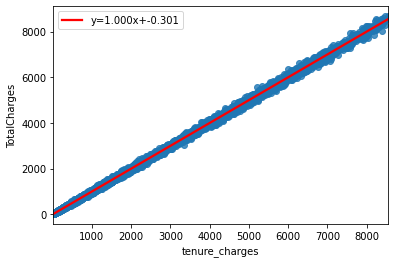

In [48]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.3f}x+{1:.3f}'.format(slope,intercept)})
ax.legend(loc="best")

In [49]:
def fillna(tenure, monthlycharge):
  if tenure == 0 :
    totcharges = monthlycharge
  else :
    totcharges = tenure * monthlycharge
    totcharges = intercept+(totcharges*slope)
  return round(totcharges,2)

In [51]:
churn_df['TotChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1)

In [52]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
431,7781-HVGMK,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,0,19,7,One year,No,18.80,NaN,No,356.96


In [55]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Statistics/master/Dataset/churn_data_actual.csv')

In [56]:
churn_merged=pd.merge(churn_df, churn_actual_df)

In [57]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
431,7781-HVGMK,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,0,19,7,One year,No,18.80,NaN,No,356.96,279.2


-------------------------------